In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

pd.set_option('display.max_rows', 10)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

%config InlineBackend.figure_format = 'retina'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [5]:
## 인구
pop = pd.read_csv('./data/23년 주민등록인구.csv', skiprows=2)
pop= pop[['동별(2)', '동별(3)', '소계.1']]
pop.columns = ['행정구', '행정동', '인구수']
pop.drop( pop[pop['행정동'] == '소계'].index, axis=0, inplace = True)
pop.sort_values('행정동', inplace = True)
pop.reset_index(drop= True, inplace = True);pop

행정구   행정동    인구수
0     송파구  가락1동  27670
1     송파구  가락2동  31450
2     송파구  가락본동  25617
3     구로구  가리봉동  12478
4     금천구   가산동  27166
..    ...   ...    ...
421   용산구   효창동  10828
422   용산구   후암동  16540
423  동대문구  휘경1동  16168
424  동대문구  휘경2동  25288
425   동작구   흑석동  32366

[426 rows x 3 columns]

In [6]:
## 산업지역

work = pd.read_csv('./data/21년 서울시 사업체현황.csv')
work_company = work[(work['동별'].str[-1] == '동') & (work['구분별'] == '사업체수') & (work['산업대분류별'] == '합계')]
worker = work[(work['동별'].str[-1] == '동') & (work['구분별'] == '종사자수') & (work['산업대분류별'] == '합계')]

worker = worker[['동별', '2021 년']].copy()
worker.columns = ['동별', '종사자수']
worker.sort_values('동별', inplace = True)
worker['동별'] = worker['동별'].replace('일원2동', '개포3동')
worker.sort_values('동별', inplace = True)
worker.reset_index(drop=True, inplace=True); worker

동별    종사자수
0    가락1동   12367
1    가락2동   11544
2    가락본동   28151
3    가리봉동    4248
4     가산동  182376
..    ...     ...
421   효창동    2596
422   후암동    4605
423  휘경1동    3690
424  휘경2동    5457
425   흑석동   11037

[426 rows x 2 columns]

In [7]:
work_com = work_company[['동별', '2021 년']].copy()
work_com.columns = ['동별', '사업체수']
work_com['동별'] = work_com['동별'].replace('일원2동', '개포3동')
work_com.sort_values('동별', inplace = True)
work_com.reset_index(drop=True, inplace=True); work_com

동별   사업체수
0    가락1동   3791
1    가락2동   3155
2    가락본동   5069
3    가리봉동   1189
4     가산동  25043
..    ...    ...
421   효창동    702
422   후암동   1367
423  휘경1동   1285
424  휘경2동   1665
425   흑석동   2136

[426 rows x 2 columns]

In [8]:
## 주거지역

house = pd.read_csv('./data/서울시 주택종류별 주택 (동별) 통계.csv', skiprows=3)
house.drop(house[house['동별(3)'] == '소계'].index, axis=0, inplace = True)
house = house[['동별(3)', '소계']]
house.columns = ['동별', '집 개수']

house['동별'] = house['동별'].replace('일원2동', '개포3동')
house.sort_values('동별', inplace = True); house.reset_index(drop=True, inplace=True); house
house



동별   집 개수
0    가락1동   9716
1    가락2동  10424
2    가락본동   8410
3    가리봉동   2551
4     가산동   6200
..    ...    ...
420   효창동   3463
421   후암동   5363
422  휘경1동   4327
423  휘경2동   6802
424   흑석동   9613

[425 rows x 2 columns]

In [9]:
# 소득


money = pd.read_csv('./data/서울시 상권분석서비스(소득소비-행정동).csv', encoding = 'cp949')
money = money[['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '월_평균_소득_금액', '지출_총금액']]
money = money[money['기준_년분기_코드'] == 20231]
money = money[['행정동_코드_명', '월_평균_소득_금액']].copy(); money
money.columns = ['동별', '소득']
money['동별'] = money['동별'].replace('일원2동', '개포3동')
money.sort_values('동별', inplace=True); money.reset_index(drop=True, inplace=True); money
money

동별       소득
0    가락1동  4973588
1    가락2동  3910198
2    가락본동  3521561
3    가리봉동  2336331
4     가산동  2567594
..    ...      ...
420   효창동  3523201
421   후암동  3013677
422  휘경1동  2722774
423  휘경2동  3071586
424   흑석동  4224946

[425 rows x 2 columns]

In [10]:
# 교통혼잡도

traffic = pd.read_csv('./data/행정동별 교통혼잡시 평균속도 .csv')
traffic['emd_code'] = traffic['emd_code'].astype('str')
seoul_traffic = traffic[traffic['emd_code'].str[:1] == '1']
seoul_traffic

sido_code  sigungu_code emd_code week_type  velocity_CG_AVRG
0        11000         11010  1101053   weekday             19.12
1        11000         11010  1101054   weekday             18.28
2        11000         11010  1101055   weekday             19.05
3        11000         11010  1101056   weekday             18.53
4        11000         11010  1101057   weekday             12.86
..         ...           ...      ...       ...               ...
419      11000         11250  1125070   weekday             14.57
420      11000         11250  1125071   weekday             16.37
421      11000         11250  1125072   weekday             15.60
422      11000         11250  1125073   weekday             21.15
423      11000         11250  1125074   weekday             17.09

[424 rows x 5 columns]

In [11]:
## 학생 비율, 노인 비율

age = pd.read_csv('./data/행정동별 연령 인구.csv', encoding = 'utf-8')
age = age[age['동별'].str[-1] == '동']

age2 = age[(age['연령별'] != '합계') & (age['항목'] == '계')]

age2.reset_index(drop=True, inplace = True)
age2.columns = ['동별', '연령별', '항목', '단위', '인구수']

age2



동별      연령별 항목  단위  인구수
0      사직동     0~4세  계 NaN  178
1      사직동     5~9세  계 NaN  310
2      사직동   10~14세  계 NaN  313
3      사직동   15~19세  계 NaN  356
4      사직동   20~24세  계 NaN  420
...    ...      ... ..  ..  ...
8941  상일2동   80~84세  계 NaN  235
8942  상일2동   85~89세  계 NaN  133
8943  상일2동   90~94세  계 NaN   56
8944  상일2동   95~99세  계 NaN   16
8945  상일2동  100세 이상  계 NaN    3

[8946 rows x 5 columns]

In [12]:
consent = age2['동별'].unique()
df = pd.DataFrame(consent, columns = ['동별'])
age_groups = age2['연령별'].unique()
age_groups.sort()
age_groups

for age_group in age_groups:
    subset = age2[age2['연령별'] == age_group].drop_duplicates(subset='동별')
    df[age_group] = subset['인구수'].values

age_df = df
age_df.shape
age_df.iloc[:, 1:22].head()

0~4세  100세 이상  10~14세  15~19세  20~24세  25~29세  30~34세  35~39세  40~44세  \
0   178        5     313     356     420     666     811     685     733   
1    36        2     105      95     102     153     161     157     228   
2   117        4     393     458     581     681     667     592     710   
3   411       12     737     795     969    1094    1053    1058    1324   
4   207        4     471     459     437     392     389     466     626   

   45~49세  ...  55~59세  5~9세  60~64세  65~69세  70~74세  75~79세  80~84세  85~89세  \
0     750  ...     696   310     727     572     369     329     302     200   
1     176  ...     184    72     216     190     140     119      91      58   
2     737  ...     791   268     729     613     391     354     275     146   
3    1215  ...    1517   622    1571    1252     725     664     469     348   
4     677  ...     592   355     619     480     342     255     259     116   

   90~94세  95~99세  
0      70      19  
1      23       4  
2      57      19  
3      99      36  
4      41       7  

[5 rows x 21 columns]

In [13]:
## 연령별 나이

age_df['합계'] = age_df.iloc[:,1:22].sum(axis=1)
age_df['10대 비율'] = (age_df['10~14세'] + age_df['15~19세']) / df['합계']
age_df['20대 비율'] = (age_df['20~24세'] + age_df['25~29세']) / df['합계']
age_df['3040 비율'] = (age_df['30~34세'] + age_df['35~39세'] + age_df['40~44세'] + age_df['45~49세']) / age_df['합계']
age_df['65세 이상 비율'] = age_df.loc[:, '65~69세':'95~99세'].sum(axis=1) / age_df['합계']; age_df

age_data = age_df[['동별', '10대 비율', '20대 비율', '3040 비율', '65세 이상 비율']].copy(); age_data
age_data['동별'] = age_data['동별'].replace('일원2동', '개포3동')
age_data.sort_values('동별', inplace=True); age_data.reset_index(drop=True, inplace=True)

In [12]:
## 지하철역 개수

subway = pd.read_csv('./data/서울시 지하철역 정보.csv', encoding = 'cp949')
subway

boundary = gpd.read_file('./data/행정동경계', encoding='cp949')


In [13]:
boundary['ADM_CD'] = boundary['ADM_CD'].astype('str')
seoul_boundary = boundary[boundary['ADM_CD'].str[0] == '1']
seoul_boundary

BASE_DATE    ADM_CD ADM_NM  \
0    20220630  11010530    사직동   
1    20220630  11010540    삼청동   
2    20220630  11010550    부암동   
3    20220630  11010560    평창동   
4    20220630  11010570    무악동   
..        ...       ...    ...   
421  20220630  11250730   천호2동   
422  20220630  11250740     길동   
423  20220630  11250750    강일동   
424  20220630  11250760   상일1동   
425  20220630  11250770   상일2동   

                                              geometry  
0    POLYGON ((197702.069 553187.311, 197703.431 55...  
1    POLYGON ((198170.457 553770.678, 198172.189 55...  
2    POLYGON ((196621.023 556395.880, 196628.323 55...  
3    POLYGON ((197800.719 559064.245, 197782.581 55...  
4    POLYGON ((196444.745 553384.564, 196471.618 55...  
..                                                 ...  
421  POLYGON ((210279.972 550065.332, 210287.877 55...  
422  POLYGON ((213117.764 549557.375, 213117.393 54...  
423  POLYGON ((215607.323 553294.531, 215601.339 55...  
424  POLYGON ((215364.723 549613.445, 215368.026 54...  
425  POLYGON ((216047.129 550997.801, 216047.081 55...  

[426 rows x 4 columns]

In [16]:
from shapely.geometry import Point, Polygon, LineString

subway['geometry'] = subway.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
subway

역사_ID   역사명      호선         위도          경도                      geometry
0     9996    미사     5호선  37.560927  127.193877  POINT (127.193877 37.560927)
1     9995    강일     5호선  37.557490  127.175930    POINT (127.17593 37.55749)
2     4929  김포공항  김포골드라인  37.562360  126.801868   POINT (126.801868 37.56236)
3     4928    고촌  김포골드라인  37.601243  126.770345  POINT (126.770345 37.601243)
4     4927    풍무  김포골드라인  37.612488  126.732387  POINT (126.732387 37.612488)
..     ...   ...     ...        ...         ...                           ...
766    154  종로5가     1호선  37.570926  127.001849  POINT (127.001849 37.570926)
767    153  종로3가     1호선  37.570406  126.991847  POINT (126.991847 37.570406)
768    152    종각     1호선  37.570161  126.982923  POINT (126.982923 37.570161)
769    151    시청     1호선  37.565715  126.977088  POINT (126.977088 37.565715)
770    150   서울역     1호선  37.556228  126.972135  POINT (126.972135 37.556228)

[771 rows x 6 columns]

In [17]:
subway = gpd.GeoDataFrame(subway)

In [18]:
subway.set_crs(epsg=4326, inplace=True)
subway.to_crs(epsg=5186, inplace = True)

In [19]:
subway_dong = gpd.sjoin(subway, seoul_boundary)

In [20]:
subway_count = subway_dong.groupby('ADM_NM').size()
sub_count = pd.DataFrame(subway_count)

sub_count.reset_index(inplace = True)
sub_count.columns = ['행정동', '지하철역 개수']
sub_count['행정동'] = sub_count['행정동'].replace('일원2동', '개포3동')
sub_count.sort_values('행정동', inplace = True); sub_count.reset_index(drop = True, inplace = True)

In [21]:
## 행정동별 버스정류장 개수

bus_loc = pd.read_csv('./data/서울시버스정류소위치정보(20240110).csv')
bus_loc


bus_loc['geometry'] = bus_loc.apply(lambda row : Point(row['X좌표'], row['Y좌표']), axis=1)
bus_loc = gpd.GeoDataFrame(bus_loc); bus_loc

bus_loc.set_crs(epsg=4326, inplace = True)
bus_loc.to_crs(epsg=5186, inplace = True)

bus_count = gpd.sjoin(bus_loc, seoul_boundary)

bus_count

NODE_ID  ARS_ID       정류소명         X좌표        Y좌표 정류소타입  \
0      100000001    1001    종로2가사거리  126.987752  37.569806  중앙차로   
3      100000004    1004   종로2가.삼일교  126.987613  37.568579  중앙차로   
9      100000385    1010        광화문  126.977880  37.570240  중앙차로   
10     100000386    1011       종로1가  126.981066  37.570148  중앙차로   
11     100000387    1012       종로1가  126.981628  37.570271  중앙차로   
...          ...     ...        ...         ...        ...   ...   
11211  124000265   25650       강동농협  127.135338  37.548070  일반차로   
11212  124000434   25651       강동농협  127.135904  37.548400  일반차로   
11214  124000269   25654  천호초교입구사거리  127.134213  37.546491  일반차로   
11253  124000399   25782      굽은다리역  127.142744  37.545589  일반차로   
11258  124000334   25995      우성아파트  127.139338  37.550386  일반차로   

                            geometry  index_right BASE_DATE    ADM_CD  \
0      POINT (198918.001 552251.750)            7  20220630  11010610   
3      POINT (198905.685 552115.650)            7  20220630  11010610   
9      POINT (198045.889 552300.092)            7  20220630  11010610   
10     POINT (198327.329 552289.885)            7  20220630  11010610   
11     POINT (198376.998 552303.500)            7  20220630  11010610   
...                              ...          ...       ...       ...   
11211  POINT (211959.641 549847.952)          413  20220630  11250610   
11212  POINT (212009.658 549884.612)          413  20220630  11250610   
11214  POINT (211860.476 549672.541)          413  20220630  11250610   
11253  POINT (212614.501 549573.500)          413  20220630  11250610   
11258  POINT (212312.788 550105.435)          413  20220630  11250610   

            ADM_NM  
0      종로1·2·3·4가동  
3      종로1·2·3·4가동  
9      종로1·2·3·4가동  
10     종로1·2·3·4가동  
11     종로1·2·3·4가동  
...            ...  
11211         천호1동  
11212         천호1동  
11214         천호1동  
11253         천호1동  
11258         천호1동  

[11248 rows x 11 columns]

In [16]:
bus_way = pd.read_csv('bus_way.csv', encoding = 'cp949')
# 각 버스정류장ARS번호에 몇개의 버스노선이 있는지 세어준다
bus_count = bus_way.groupby('버스정류장ARS번호').size()
bus_count = pd.DataFrame(bus_count)
bus_count.reset_index(inplace = True)
bus_count

C:\Users\hwnam\AppData\Local\Temp\ipykernel_9104\1090490602.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_way = pd.read_csv('bus_way.csv', encoding = 'cp949')


버스정류장ARS번호    0
0           1001    4
1           1002   19
2           1003   19
3           1004    7
4           1005   18
...          ...  ...
12598      78105    1
12599      78106    1
12600      78107    1
12601      78108    1
12602          ~  228

[12603 rows x 2 columns]

In [23]:
##

station = pd.DataFrame(bus_count.groupby(['ADM_CD', 'ADM_NM']).size())
station.reset_index(inplace = True)
station.columns = ['행정동코드', '행정동명', '버스정류장 개수']
station['행정동명'] = station['행정동명'].replace('일원2동', '개포3동')
station['행정동명'] = station['행정동명'].replace('상일1동', '상일동')
station['행정동명'] = station['행정동명'].replace('상일2동', '상일동')

station.sort_values('행정동명', inplace = True)
station.reset_index(inplace = True, drop =True)
station.iloc[246, 1] = '신사동1'
station.iloc[247, 1] = '신사동2'
station = station.groupby('행정동명').sum()
station.reset_index(inplace = True); station.head()
station

행정동명  버스정류장 개수
0    가락1동        14
1    가락2동        21
2    가락본동        25
3    가리봉동         9
4     가산동       105
..    ...       ...
420   효창동        15
421   후암동        16
422  휘경1동        13
423  휘경2동        18
424   흑석동        48

[425 rows x 2 columns]

In [28]:
## 자동차 등록대수
car = pd.read_csv('./data/서울시 행정동별 자동차 등록대수 현황.csv', encoding = 'cp949')
car = car.groupby('읍면동 (행정동)').sum()
car.reset_index(inplace = True)
car['읍면동 (행정동)'] = car['읍면동 (행정동)'].str.strip()
car = car[car['읍면동 (행정동)'].str[-1] == '동']
car['읍면동 (행정동)'] = car['읍면동 (행정동)'].str.split(' ').str[1]
car.sort_values('읍면동 (행정동)', inplace = True)
car.reset_index(inplace = True, drop=True)
car[car['읍면동 (행정동)'] == '신사동']
car.iloc[262,0] = '신사동1'
car.iloc[263,0] = '신사동2'
car = car[['읍면동 (행정동)', '계']]
car.columns = ['읍면동', '자동차 등록대수']
car['읍면동'] = car['읍면동'].replace('일원2동', '개포3동')
car['읍면동'] = car['읍면동'].str.replace('.', '·' )
pd.set_option('display.max_rows', 10)
car


C:\Users\hwnam\AppData\Local\Temp\ipykernel_19500\679693419.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car['읍면동'] = car['읍면동'].str.replace('.', '·' )


읍면동  자동차 등록대수
0    가락1동   11406.0
1    가락2동   10758.0
2    가락본동   12586.0
3    가리봉동    2730.0
4     가산동   20010.0
..    ...       ...
444   효창동    3246.0
445   후암동    4014.0
446  휘경1동    3932.0
447  휘경2동    6353.0
448   흑석동    9097.0

[449 rows x 2 columns]

In [29]:
# 서울트래픽, 지하철역 개수, 행정동별 버스 노선 개수, 상일1, 2동 병합
# , house, money, age_data, station]
df2 = pd.concat([pop, work_com, worker], axis=1)
df2
df2.loc[df2[df2['행정동'].str.contains('상일')].index, '행정동'] = '상일동'


df2[['사업체수','종사자수']] = df2[['사업체수', '종사자수']].astype('int64')

df2 = df2.groupby(['행정구','행정동']).sum()
df2.reset_index(inplace = True)
df2.sort_values('행정동', inplace = True)
df2.reset_index(inplace = True, drop=True)
df2

df3 = pd.concat([df2, house, money, age_data, station], axis=1)
df3.drop('동별', axis=1, inplace = True)

df4 = pd.merge(df3, sub_count, how='left')
df4


df5 = pd.merge(df4, car,left_on = '행정동명', right_on ='읍면동', how='left')

df5['지하철역 개수'] = df5['지하철역 개수'].fillna(0)

df5


행정구   행정동    인구수   사업체수    종사자수   집 개수       소득    10대 비율    20대 비율  \
0     송파구  가락1동  27670   3791   12367   9716  4973588  0.096314  0.095699   
1     송파구  가락2동  31450   3155   11544  10424  3910198  0.103529  0.130175   
2     송파구  가락본동  25617   5069   28151   8410  3521561  0.063552  0.140571   
3     구로구  가리봉동  12478   1189    4248   2551  2336331  0.025325  0.146818   
4     금천구   가산동  27166  25043  182376   6200  2567594  0.025068  0.268571   
..    ...   ...    ...    ...     ...    ...      ...       ...       ...   
420   용산구   효창동  10828    702    2596   3463  3523201  0.062615  0.152290   
421   용산구   후암동  16540   1367    4605   5363  3013677  0.068622  0.137485   
422  동대문구  휘경1동  16168   1285    3690   4327  2722774  0.055418  0.348714   
423  동대문구  휘경2동  25288   1665    5457   6802  3071586  0.077349  0.261152   
424   동작구   흑석동  32366   2136   11037   9613  4224946  0.074337  0.195298   

      3040 비율  65세 이상 비율  행정동명  버스정류장 개수  지하철역 개수   읍면동  자동차 등록대수  
0    0.354355   0.142212  가락1동        14      3.0  가락1동   11406.0  
1    0.310715   0.149571  가락2동        21      2.0  가락2동   10758.0  
2    0.318070   0.164930  가락본동        25      1.0  가락본동   12586.0  
3    0.285062   0.178875  가리봉동         9      0.0  가리봉동    2730.0  
4    0.376058   0.110248   가산동       105      3.0   가산동   20010.0  
..        ...        ...   ...       ...      ...   ...       ...  
420  0.337828   0.147950   효창동        15      0.0   효창동    3246.0  
421  0.320798   0.185248   후암동        16      0.0   후암동    4014.0  
422  0.244805   0.135267  휘경1동        13      1.0  휘경1동    3932.0  
423  0.251028   0.167550  휘경2동        18      0.0  휘경2동    6353.0  
424  0.279398   0.160353   흑석동        48      1.0   흑석동    9097.0  

[425 rows x 16 columns]

In [30]:
# 교통혼잡도
traffic = pd.read_csv('./data/행정동별 교통혼잡시 평균속도 .csv')
traffic['emd_code'] = traffic['emd_code'].astype('str')
seoul_traffic = traffic[traffic['emd_code'].str[:1] == '1']
seoul_traffic.head()

sido_code  sigungu_code emd_code week_type  velocity_CG_AVRG
0      11000         11010  1101053   weekday             19.12
1      11000         11010  1101054   weekday             18.28
2      11000         11010  1101055   weekday             19.05
3      11000         11010  1101056   weekday             18.53
4      11000         11010  1101057   weekday             12.86

In [31]:
dong = gpd.read_file('./data/HangJeongDong_ver20230701.geojson')

In [32]:
pd.set_option('display.max_rows',10)

df = seoul_traffic.merge(dong, left_on='emd_code', right_on='adm_cd', how='left')
df.loc[df[df['emd_code'] == '1123074'].index, 'temp'] = '강남구 개포3동'
df.loc[df[df['emd_code'] == '1125051'].index, 'temp'] = '강동구 강일동'
df.loc[df[df['emd_code'] == '1125052'].index, 'temp'] = '강동구 상일동'


congestion = df[['temp', 'velocity_CG_AVRG']]
congestion.columns = ['행정동', '도로 평균 속도']

congestion['행정구'] = congestion['행정동'].copy().str.split(' ').str[0]
congestion['행정동'] = congestion['행정동'].copy().str.split(' ').str[1]
congestion



C:\Users\hwnam\AppData\Local\Temp\ipykernel_19500\634278005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion['행정구'] = congestion['행정동'].copy().str.split(' ').str[0]
C:\Users\hwnam\AppData\Local\Temp\ipykernel_19500\634278005.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion['행정동'] = congestion['행정동'].copy().str.split(' ').str[1]


행정동  도로 평균 속도  행정구
0     사직동     19.12  종로구
1     삼청동     18.28  종로구
2     부암동     19.05  종로구
3     평창동     18.53  종로구
4     무악동     12.86  종로구
..    ...       ...  ...
419  둔촌1동     14.57  강동구
420  둔촌2동     16.37  강동구
421  암사1동     15.60  강동구
422  천호2동     21.15  강동구
423    길동     17.09  강동구

[424 rows x 3 columns]

In [33]:
congestion.sort_values('행정동', inplace = True)
congestion.reset_index(inplace = True, drop=True)
congestion.head()

C:\Users\hwnam\AppData\Local\Temp\ipykernel_19500\322016502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion.sort_values('행정동', inplace = True)


행정동  도로 평균 속도  행정구
0  가락1동     16.42  송파구
1  가락2동     15.61  송파구
2  가락본동     16.24  송파구
3  가리봉동     15.08  구로구
4   가산동     18.46  금천구

In [34]:
congestion['행정동'] = congestion['행정동'].str.replace('·', '.')
df10 = pd.merge(df5, congestion, left_on=['행정구', '행정동'], right_on=['행정구', '행정동'], how = 'left')
df10.fillna(df10['도로 평균 속도'].mean(), inplace = True)
df10.drop(['읍면동'], axis=1, inplace = True)
df10.to_csv('독립변수 정리.csv', encoding = 'cp949')
df10

C:\Users\hwnam\AppData\Local\Temp\ipykernel_19500\1691265517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion['행정동'] = congestion['행정동'].str.replace('·', '.')


행정구   행정동    인구수   사업체수    종사자수   집 개수       소득    10대 비율    20대 비율  \
0     송파구  가락1동  27670   3791   12367   9716  4973588  0.096314  0.095699   
1     송파구  가락2동  31450   3155   11544  10424  3910198  0.103529  0.130175   
2     송파구  가락본동  25617   5069   28151   8410  3521561  0.063552  0.140571   
3     구로구  가리봉동  12478   1189    4248   2551  2336331  0.025325  0.146818   
4     금천구   가산동  27166  25043  182376   6200  2567594  0.025068  0.268571   
..    ...   ...    ...    ...     ...    ...      ...       ...       ...   
420   용산구   효창동  10828    702    2596   3463  3523201  0.062615  0.152290   
421   용산구   후암동  16540   1367    4605   5363  3013677  0.068622  0.137485   
422  동대문구  휘경1동  16168   1285    3690   4327  2722774  0.055418  0.348714   
423  동대문구  휘경2동  25288   1665    5457   6802  3071586  0.077349  0.261152   
424   동작구   흑석동  32366   2136   11037   9613  4224946  0.074337  0.195298   

      3040 비율  65세 이상 비율  행정동명  버스정류장 개수  지하철역 개수  자동차 등록대수  도로 평균 속도  
0    0.354355   0.142212  가락1동        14      3.0   11406.0     16.42  
1    0.310715   0.149571  가락2동        21      2.0   10758.0     15.61  
2    0.318070   0.164930  가락본동        25      1.0   12586.0     16.24  
3    0.285062   0.178875  가리봉동         9      0.0    2730.0     15.08  
4    0.376058   0.110248   가산동       105      3.0   20010.0     18.46  
..        ...        ...   ...       ...      ...       ...       ...  
420  0.337828   0.147950   효창동        15      0.0    3246.0     16.11  
421  0.320798   0.185248   후암동        16      0.0    4014.0     18.46  
422  0.244805   0.135267  휘경1동        13      1.0    3932.0     22.15  
423  0.251028   0.167550  휘경2동        18      0.0    6353.0     15.97  
424  0.279398   0.160353   흑석동        48      1.0    9097.0     15.36  

[425 rows x 16 columns]

In [62]:
bus_use = pd.read_csv('./data/bus_user.csv', encoding = 'cp949')

In [63]:
bus_use['기준_날짜'] = bus_use['기준_날짜'].astype('str')
bus_2023 = bus_use[bus_use['기준_날짜'].str.startswith('2023')]
bus_dong = bus_2023.groupby('행정동_ID').sum()
bus_dong = bus_dong.reset_index()
bus_dong = bus_dong[['행정동_ID', '버스_승객_수']]
bus_dong = bus_dong[bus_dong['버스_승객_수'] != 0]
bus_dong.reset_index(inplace = True, drop=True)


In [64]:
#0번째 행부터 423번째 행까지의 id코드에 10을 곱한다.
bus_dong.iloc[:424,:1] = bus_dong.iloc[:424,:1] * 10
bus_dong = bus_dong.rename(columns = {'행정동_ID' : '행정동코드'})
bus_dong

행정동코드     버스_승객_수
0    11010530   9308863.0
1    11010540   1556254.0
2    11010550   3438608.0
3    11010560   3042777.0
4    11010570    678600.0
5    11010580   3444757.0
6    11010600    746181.0
7    11010610  21754557.0
8    11010630   4173575.0
9    11010640   4872040.0
10   11010670   3497066.0
11   11010680     49093.0
12   11010690    462291.0
13   11010700   2272714.0
14   11010710   1882192.0
15   11010720   2624015.0
16   11010730   6065276.0
17   11020520  10478174.0
18   11020540  10575992.0
19   11020550   7814297.0
20   11020570   1716119.0
21   11020580   1544422.0
22   11020590   4408809.0
23   11020600   1375133.0
24   11020650   2048265.0
25   11020670   1322873.0
26   11020680   1620411.0
27   11020690   1476415.0
28   11020700   1245783.0
29   11020710   1272165.0
30   11020720    841432.0
31   11020730    421784.0
32   11030510   2013096.0
33   11030520   4201230.0
34   11030530   6779188.0
35   11030570   1943768.0
36   11030580   1450527.0
37   11030590   1040371.0
38   11030630   2102613.0
39   11030640   1067664.0
40   11030650   2251405.0
41   11030660   1507125.0
42   11030690   2509394.0
43   11030700   1888649.0
44   11030710   2619719.0
45   11030720   3002881.0
46   11030730   9825864.0
47   11030740   9193020.0
48   11040520   1433761.0
49   11040540   2051915.0
50   11040550   1906241.0
51   11040560   4692729.0
52   11040570   1847446.0
53   11040580   1288494.0
54   11040590   1378830.0
55   11040620   2460087.0
56   11040650   1868859.0
57   11040660   1233322.0
58   11040670   1994251.0
59   11040680   2065402.0
60   11040690   1064026.0
61   11040700   2629249.0
62   11040710   2630937.0
63   11040720   1701264.0
64   11040730   2578836.0
65   11050530   4004519.0
66   11050540   3163247.0
67   11050550   1548771.0
68   11050560   1997117.0
69   11050570   1808598.0
70   11050580   1213502.0
71   11050590   2394160.0
72   11050600   2661550.0
73   11050610   2650439.0
74   11050620   2317263.0
75   11050630   1846747.0
76   11050640   2169128.0
77   11050650   2349281.0
78   11050660   2251916.0
79   11050670   2032779.0
80   11060710   2591529.0
81   11060720   4182002.0
82   11060730   4013363.0
83   11060800   4427187.0
84   11060810  11476094.0
85   11060820   7291981.0
86   11060830   7768481.0
87   11060840   3201238.0
88   11060860   3721630.0
89   11060870   6358798.0
90   11060880   5195318.0
91   11060890   2588776.0
92   11060900   1249008.0
93   11060910   2597161.0
94   11070520   2267060.0
95   11070540   1751755.0
96   11070550   1613075.0
97   11070570   2047839.0
98   11070590    969581.0
99   11070600   6049799.0
100  11070610   1224590.0
101  11070620   3704224.0
102  11070640   2558874.0
103  11070650   1155082.0
104  11070680   1583322.0
105  11070690   5214132.0
106  11070700   3512814.0
107  11070710   4626183.0
108  11070720   3721356.0
109  11070730   5795777.0
110  11080580   4824341.0
111  11080590   1850956.0
112  11080600   3088773.0
113  11080610   2218339.0
114  11080620   3038516.0
115  11080630   3635690.0
116  11080640   3072538.0
117  11080650   4919776.0
118  11080660   5503471.0
119  11080680   3716251.0
120  11080710   3772746.0
121  11080720   2135367.0
122  11080760   3063864.0
123  11080770   2003896.0
124  11080780   2169582.0
125  11080810   4889077.0
126  11080820   7403207.0
127  11080830   6181899.0
128  11080840   6444324.0
129  11080850   4522379.0
130  11090600   7530432.0
131  11090610   3108829.0
132  11090620   2510593.0
133  11090630   4214486.0
134  11090640   2524467.0
135  11090650   7166319.0
136  11090690   2078342.0
137  11090700   3764254.0
138  11090710  11216304.0
139  11090720   4953920.0
140  11090730   2479089.0
141  11090740   3635579.0
142  11090750   3142500.0
143  11100510   2760431.0
144  11100520   3218821.0
145  11100530   2651292.0
146  11100540   2032300.0
147  11100550   3488309.0
148  11100560   1536198.0
149  11100570   3061111.0
150  11100590   4389015.0
151  11100600   2506087.0
152  11100610   1750136.0
153 

In [65]:
dong_code = pd.read_excel('./data/adm_code (1).xls', skiprows=1)
dong_code

시도코드     시도명칭  시군구코드 시군구명칭  읍면동코드 읍면동명칭
0       11    서울특별시     10   종로구    530   사직동
1       11    서울특별시     10   종로구    540   삼청동
2       11    서울특별시     10   종로구    550   부암동
3       11    서울특별시     10   종로구    560   평창동
4       11    서울특별시     10   종로구    570   무악동
...    ...      ...    ...   ...    ...   ...
3523    39  제주특별자치도     20  서귀포시    580   서홍동
3524    39  제주특별자치도     20  서귀포시    590   대륜동
3525    39  제주특별자치도     20  서귀포시    600   대천동
3526    39  제주특별자치도     20  서귀포시    610   중문동
3527    39  제주특별자치도     20  서귀포시    620   예래동

[3528 rows x 6 columns]

In [66]:
dong_code['행정동코드'] = dong_code['시도코드'] *1000000 + dong_code['시군구코드'] * 1000  + dong_code['읍면동코드']
dong_code = dong_code.iloc[:426]
dong_code = dong_code[['행정동코드', '시군구명칭', '읍면동명칭']]
dong_code

행정동코드 시군구명칭        읍면동명칭
0    11010530   종로구          사직동
1    11010540   종로구          삼청동
2    11010550   종로구          부암동
3    11010560   종로구          평창동
4    11010570   종로구          무악동
5    11010580   종로구          교남동
6    11010600   종로구          가회동
7    11010610   종로구  종로1·2·3·4가동
8    11010630   종로구      종로5·6가동
9    11010640   종로구          이화동
10   11010670   종로구         창신1동
11   11010680   종로구         창신2동
12   11010690   종로구         창신3동
13   11010700   종로구         숭인1동
14   11010710   종로구         숭인2동
15   11010720   종로구        청운효자동
16   11010730   종로구          혜화동
17   11020520    중구          소공동
18   11020540    중구          회현동
19   11020550    중구           명동
20   11020570    중구           필동
21   11020580    중구          장충동
22   11020590    중구          광희동
23   11020600    중구         을지로동
24   11020650    중구         신당5동
25   11020670    중구          황학동
26   11020680    중구          중림동
27   11020690    중구          신당동
28   11020700    중구          다산동
29   11020710    중구          약수동
30   11020720    중구          청구동
31   11020730    중구          동화동
32   11030510   용산구          후암동
33   11030520   용산구        용산2가동
34   11030530   용산구          남영동
35   11030570   용산구        원효로2동
36   11030580   용산구          효창동
37   11030590   용산구          용문동
38   11030630   용산구         이촌1동
39   11030640   용산구         이촌2동
40   11030650   용산구        이태원1동
41   11030660   용산구        이태원2동
42   11030690   용산구         서빙고동
43   11030700   용산구          보광동
44   11030710   용산구          청파동
45   11030720   용산구        원효로1동
46   11030730   용산구         한강로동
47   11030740   용산구          한남동
48   11040520   성동구        왕십리2동
49   11040540   성동구          마장동
50   11040550   성동구          사근동
51   11040560   성동구         행당1동
52   11040570   성동구         행당2동
53   11040580   성동구          응봉동
54   11040590   성동구        금호1가동
55   11040620   성동구        금호4가동
56   11040650   성동구       성수1가1동
57   11040660   성동구       성수1가2동
58   11040670   성동구       성수2가1동
59   11040680   성동구       성수2가3동
60   11040690   성동구          송정동
61   11040700   성동구          용답동
62   11040710   성동구       왕십리도선동
63   11040720   성동구      금호2·3가동
64   11040730   성동구          옥수동
65   11050530   광진구          화양동
66   11050540   광진구          군자동
67   11050550   광진구         중곡1동
68   11050560   광진구         중곡2동
69   11050570   광진구         중곡3동
70   11050580   광진구         중곡4동
71   11050590   광진구           능동
72   11050600   광진구         구의1동
73   11050610   광진구         구의2동
74   11050620   광진구         구의3동
75   11050630   광진구          광장동
76   11050640   광진구         자양1동
77   11050650   광진구         자양2동
78   11050660   광진구         자양3동
79   11050670   광진구         자양4동
80   11060710  동대문구          회기동
81   11060720  동대문구         휘경1동
82   11060730  동대문구         휘경2동
83   11060800  동대문구         청량리동
84   11060810  동대문구          용신동
85   11060820  동대문구          제기동
86   11060830  동대문구         전농1동
87   11060840  동대문구         전농2동
88   11060860  동대문구        답십리2동
89   11060870  동대문구         장안1동
90   11060880  동대문구         장안2동
91   11060890  동대문구         이문1동
92   11060900  동대문구         이문2동
93   11060910  동대문구        답십리1동
94   11070520   중랑구         면목2동
95   11070540   중랑구         면목4동
96   11070550   중랑구         면목5동
97   11070570   중랑구         면목7동
98   11070590   중랑구         상봉1동
99   11070600   중랑구         상봉2동
100  11070610   중랑구         중화1동
101  11070620   중랑구         중화2동
102  11070640   중랑구          묵1동
103  11070650   중랑구          묵2동
104  11070680   중랑구         망우3동
105  11070690   중랑구         신내1동
106  11070700   중랑구         신내2동
107  11070710   중랑구         면목본동
108  11070720   중랑구       면목3·8동
109  11070730   중랑구         망우본동
110  11080580   성북구         돈암1동
111  11080590   성북구         돈암2동
112  11080600   성북구          안암동
113  11080610   성북구          보문동
114  11080620   성북구         정릉1동
115  11080630   성북구         정릉2동
116  11080640   성북구         정릉3동
117  11080650   성북구         정릉4동
118  11080660   성북구         길음1동
119  11080680   성북구         길음2동
120  11080710  

In [67]:
merge_df = pd.merge(bus_dong, dong_code, on='행정동코드', how = 'outer')
pd.set_option('display.max_rows', 500)
merge_df

행정동코드     버스_승객_수 시군구명칭        읍면동명칭
0    11010530   9308863.0   종로구          사직동
1    11010540   1556254.0   종로구          삼청동
2    11010550   3438608.0   종로구          부암동
3    11010560   3042777.0   종로구          평창동
4    11010570    678600.0   종로구          무악동
5    11010580   3444757.0   종로구          교남동
6    11010600    746181.0   종로구          가회동
7    11010610  21754557.0   종로구  종로1·2·3·4가동
8    11010630   4173575.0   종로구      종로5·6가동
9    11010640   4872040.0   종로구          이화동
10   11010670   3497066.0   종로구         창신1동
11   11010680     49093.0   종로구         창신2동
12   11010690    462291.0   종로구         창신3동
13   11010700   2272714.0   종로구         숭인1동
14   11010710   1882192.0   종로구         숭인2동
15   11010720   2624015.0   종로구        청운효자동
16   11010730   6065276.0   종로구          혜화동
17   11020520  10478174.0    중구          소공동
18   11020540  10575992.0    중구          회현동
19   11020550   7814297.0    중구           명동
20   11020570   1716119.0    중구           필동
21   11020580   1544422.0    중구          장충동
22   11020590   4408809.0    중구          광희동
23   11020600   1375133.0    중구         을지로동
24   11020650   2048265.0    중구         신당5동
25   11020670   1322873.0    중구          황학동
26   11020680   1620411.0    중구          중림동
27   11020690   1476415.0    중구          신당동
28   11020700   1245783.0    중구          다산동
29   11020710   1272165.0    중구          약수동
30   11020720    841432.0    중구          청구동
31   11020730    421784.0    중구          동화동
32   11030510   2013096.0   용산구          후암동
33   11030520   4201230.0   용산구        용산2가동
34   11030530   6779188.0   용산구          남영동
35   11030570   1943768.0   용산구        원효로2동
36   11030580   1450527.0   용산구          효창동
37   11030590   1040371.0   용산구          용문동
38   11030630   2102613.0   용산구         이촌1동
39   11030640   1067664.0   용산구         이촌2동
40   11030650   2251405.0   용산구        이태원1동
41   11030660   1507125.0   용산구        이태원2동
42   11030690   2509394.0   용산구         서빙고동
43   11030700   1888649.0   용산구          보광동
44   11030710   2619719.0   용산구          청파동
45   11030720   3002881.0   용산구        원효로1동
46   11030730   9825864.0   용산구         한강로동
47   11030740   9193020.0   용산구          한남동
48   11040520   1433761.0   성동구        왕십리2동
49   11040540   2051915.0   성동구          마장동
50   11040550   1906241.0   성동구          사근동
51   11040560   4692729.0   성동구         행당1동
52   11040570   1847446.0   성동구         행당2동
53   11040580   1288494.0   성동구          응봉동
54   11040590   1378830.0   성동구        금호1가동
55   11040620   2460087.0   성동구        금호4가동
56   11040650   1868859.0   성동구       성수1가1동
57   11040660   1233322.0   성동구       성수1가2동
58   11040670   1994251.0   성동구       성수2가1동
59   11040680   2065402.0   성동구       성수2가3동
60   11040690   1064026.0   성동구          송정동
61   11040700   2629249.0   성동구          용답동
62   11040710   2630937.0   성동구       왕십리도선동
63   11040720   1701264.0   성동구      금호2·3가동
64   11040730   2578836.0   성동구          옥수동
65   11050530   4004519.0   광진구          화양동
66   11050540   3163247.0   광진구          군자동
67   11050550   1548771.0   광진구         중곡1동
68   11050560   1997117.0   광진구         중곡2동
69   11050570   1808598.0   광진구         중곡3동
70   11050580   1213502.0   광진구         중곡4동
71   11050590   2394160.0   광진구           능동
72   11050600   2661550.0   광진구         구의1동
73   11050610   2650439.0   광진구         구의2동
74   11050620   2317263.0   광진구         구의3동
75   11050630   1846747.0   광진구          광장동
76   11050640   2169128.0   광진구         자양1동
77   11050650   2349281.0   광진구         자양2동
78   11050660   2251916.0   광진구         자양3동
79   11050670   2032779.0   광진구         자양4동
80   11060710   2591529.0  동대문구          회기동
81   11060720   4182002.0  동대문구         휘경1동
82   11060730   4013363.0  동대문구         휘경2동
83   11060800   4427187.0  동대문구         청량리동
84   11060810  11476094.0  동대문구          용신동
85   11060820   7291981.0  동대문구          제기동
86   11060830   7768481.0  동대문구         전농1동
87   11060840   3201238.0  동대문구         전농2동
88 

In [ ]:
merge_df = merge_df.append({'행정동코드' : 11170730, '버스_승객_수' : 4062362,'시군구명칭' : '구로구', '읍면동명칭' : '오류2동'}, ignore_index=True)
merge_df = merge_df.append({'행정동코드' : 11250520, '버스_승객_수' : 2346430, '시군구명칭' : '강동구', '읍면동명칭' : '상일동'}, ignore_index=True)


In [88]:
import pandas as pd
data_df = pd.read_csv('data_all.csv', encoding = 'cp949')
data_df = data_df.drop(['Unnamed: 0'], axis=1)
data_df

행정구   행정동    인구수    age_10    age_20  age_3040       노약자   사업체수    종사자수  \
0     송파구  가락1동  27670  0.096314  0.095699  0.354355  0.142212   3791   12367   
1     송파구  가락2동  31450  0.103529  0.130175  0.310715  0.149571   3155   11544   
2     송파구  가락본동  25617  0.063552  0.140571  0.318070  0.164930   5069   28151   
3     구로구  가리봉동  12478  0.025325  0.146818  0.285062  0.178875   1189    4248   
4     금천구   가산동  27166  0.025068  0.268571  0.376058  0.110248  25043  182376   
..    ...   ...    ...       ...       ...       ...       ...    ...     ...   
420   용산구   효창동  10828  0.062615  0.152290  0.337828  0.147950    702    2596   
421   용산구   후암동  16540  0.068622  0.137485  0.320798  0.185248   1367    4605   
422  동대문구  휘경1동  16168  0.055418  0.348714  0.244805  0.135267   1285    3690   
423  동대문구  휘경2동  25288  0.077349  0.261152  0.251028  0.167550   1665    5457   
424   동작구   흑석동  32366  0.074337  0.195298  0.279398  0.160353   2136   11037   

       집개수       소득  버스정류장개수  지하철역개수  도로평균속도  1인당자동차등록대수  시내버스노선수     버스승차량  
0     9716  4973588       14       3   16.42    0.412215      131   2536468  
1    10424  3910198       21       2   15.61    0.342067       60   2364616  
2     8410  3521561       25       1   16.24    0.491314      105   3266207  
3     2551  2336331        9       0   15.08    0.218785       63   2449595  
4     6200  2567594      105       3   18.46    0.736582      199  11305765  
..     ...      ...      ...     ...     ...         ...      ...       ...  
420   3463  3523201       15       0   16.11    0.299778       36   1690652  
421   5363  3013677       16       0   18.46    0.242684       23   2036706  
422   4327  2722774       13       1   22.15    0.243196       83   4863450  
423   6802  3071586       18       0   15.97    0.251226      147   3425222  
424   9613  4224946       48       1   15.36    0.281067      104   6095541  

[425 rows x 17 columns]

<Axes: >

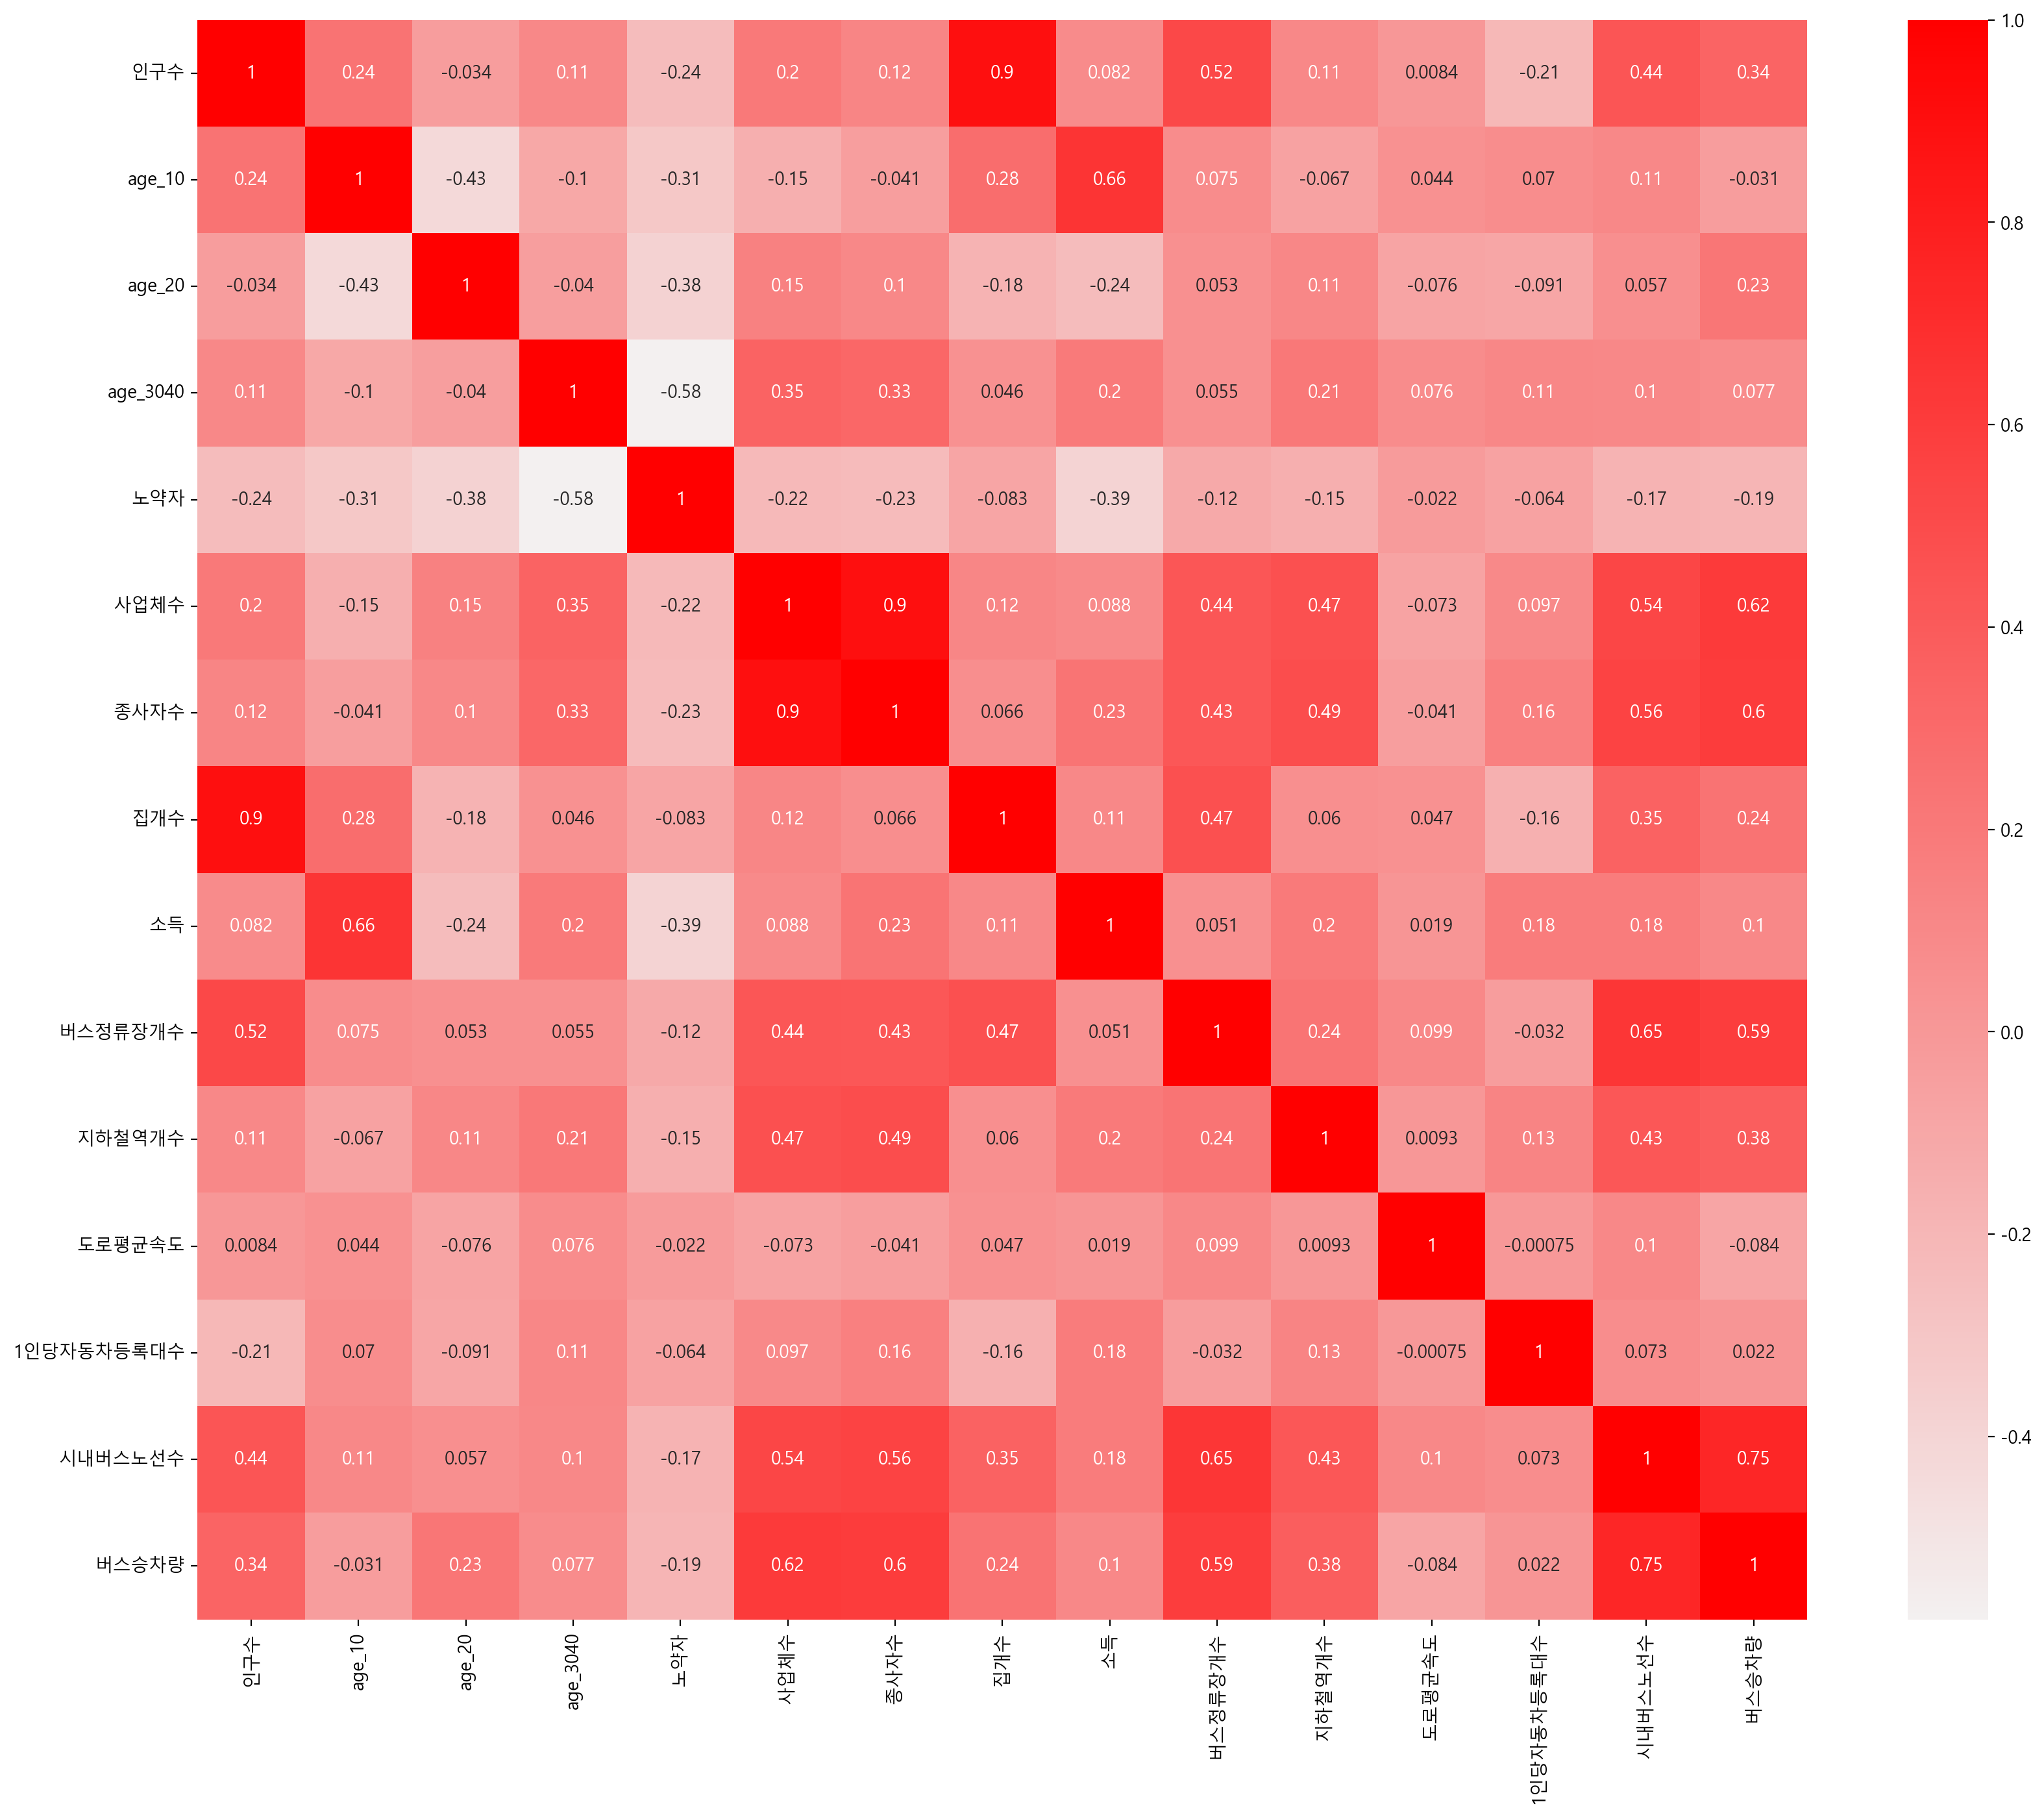

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 16]
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(data_df.corr(), annot=True, cmap=cmap)

In [64]:
sns.pairplot(data_df[data_df.columns[1:]], kind='reg', diag_kind='kde')
plt.show()

### 데이터 분석

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [91]:
X = data_df[data_df.columns[2:16]]
y = data_df[['버스승차량']]

In [92]:
X

인구수    age_10    age_20  age_3040       노약자   사업체수    종사자수    집개수  \
0    27670  0.096314  0.095699  0.354355  0.142212   3791   12367   9716   
1    31450  0.103529  0.130175  0.310715  0.149571   3155   11544  10424   
2    25617  0.063552  0.140571  0.318070  0.164930   5069   28151   8410   
3    12478  0.025325  0.146818  0.285062  0.178875   1189    4248   2551   
4    27166  0.025068  0.268571  0.376058  0.110248  25043  182376   6200   
..     ...       ...       ...       ...       ...    ...     ...    ...   
420  10828  0.062615  0.152290  0.337828  0.147950    702    2596   3463   
421  16540  0.068622  0.137485  0.320798  0.185248   1367    4605   5363   
422  16168  0.055418  0.348714  0.244805  0.135267   1285    3690   4327   
423  25288  0.077349  0.261152  0.251028  0.167550   1665    5457   6802   
424  32366  0.074337  0.195298  0.279398  0.160353   2136   11037   9613   

          소득  버스정류장개수  지하철역개수  도로평균속도  1인당자동차등록대수  시내버스노선수  
0    4973588       14       3   16.42    0.412215      131  
1    3910198       21       2   15.61    0.342067       60  
2    3521561       25       1   16.24    0.491314      105  
3    2336331        9       0   15.08    0.218785       63  
4    2567594      105       3   18.46    0.736582      199  
..       ...      ...     ...     ...         ...      ...  
420  3523201       15       0   16.11    0.299778       36  
421  3013677       16       0   18.46    0.242684       23  
422  2722774       13       1   22.15    0.243196       83  
423  3071586       18       0   15.97    0.251226      147  
424  4224946       48       1   15.36    0.281067      104  

[425 rows x 14 columns]

In [93]:
X.head()

인구수    age_10    age_20  age_3040       노약자   사업체수    종사자수    집개수  \
0  27670  0.096314  0.095699  0.354355  0.142212   3791   12367   9716   
1  31450  0.103529  0.130175  0.310715  0.149571   3155   11544  10424   
2  25617  0.063552  0.140571  0.318070  0.164930   5069   28151   8410   
3  12478  0.025325  0.146818  0.285062  0.178875   1189    4248   2551   
4  27166  0.025068  0.268571  0.376058  0.110248  25043  182376   6200   

        소득  버스정류장개수  지하철역개수  도로평균속도  1인당자동차등록대수  시내버스노선수  
0  4973588       14       3   16.42    0.412215      131  
1  3910198       21       2   15.61    0.342067       60  
2  3521561       25       1   16.24    0.491314      105  
3  2336331        9       0   15.08    0.218785       63  
4  2567594      105       3   18.46    0.736582      199

In [94]:
y.head()

버스승차량
0   2536468
1   2364616
2   3266207
3   2449595
4  11305765

In [96]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [71]:
# 표준화
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
# 선형 회귀 모델 학습
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
# 계수 출력
coeff_df = pd.DataFrame(regressor.coef_.flatten(), X.columns, columns=['Coefficient'])
print(coeff_df)

             Coefficient
인구수        -7.783033e+04
age_10     -2.537082e+05
age_20      2.771960e+05
age_3040   -3.357899e+05
노약자        -2.062442e+05
...                  ...
버스정류장개수     2.771059e+05
지하철역개수      2.114305e+04
도로평균속도     -2.693236e+05
1인당자동차등록대수 -8.232498e+04
시내버스노선수     1.529300e+06

[14 rows x 1 columns]


In [74]:
# 예측
y_pred = regressor.predict(X_test)

In [75]:
# 성능 평가
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1048202.6890166219
Mean Squared Error: 2288238898380.235
Root Mean Squared Error: 1512692.5987722143


<Axes: >

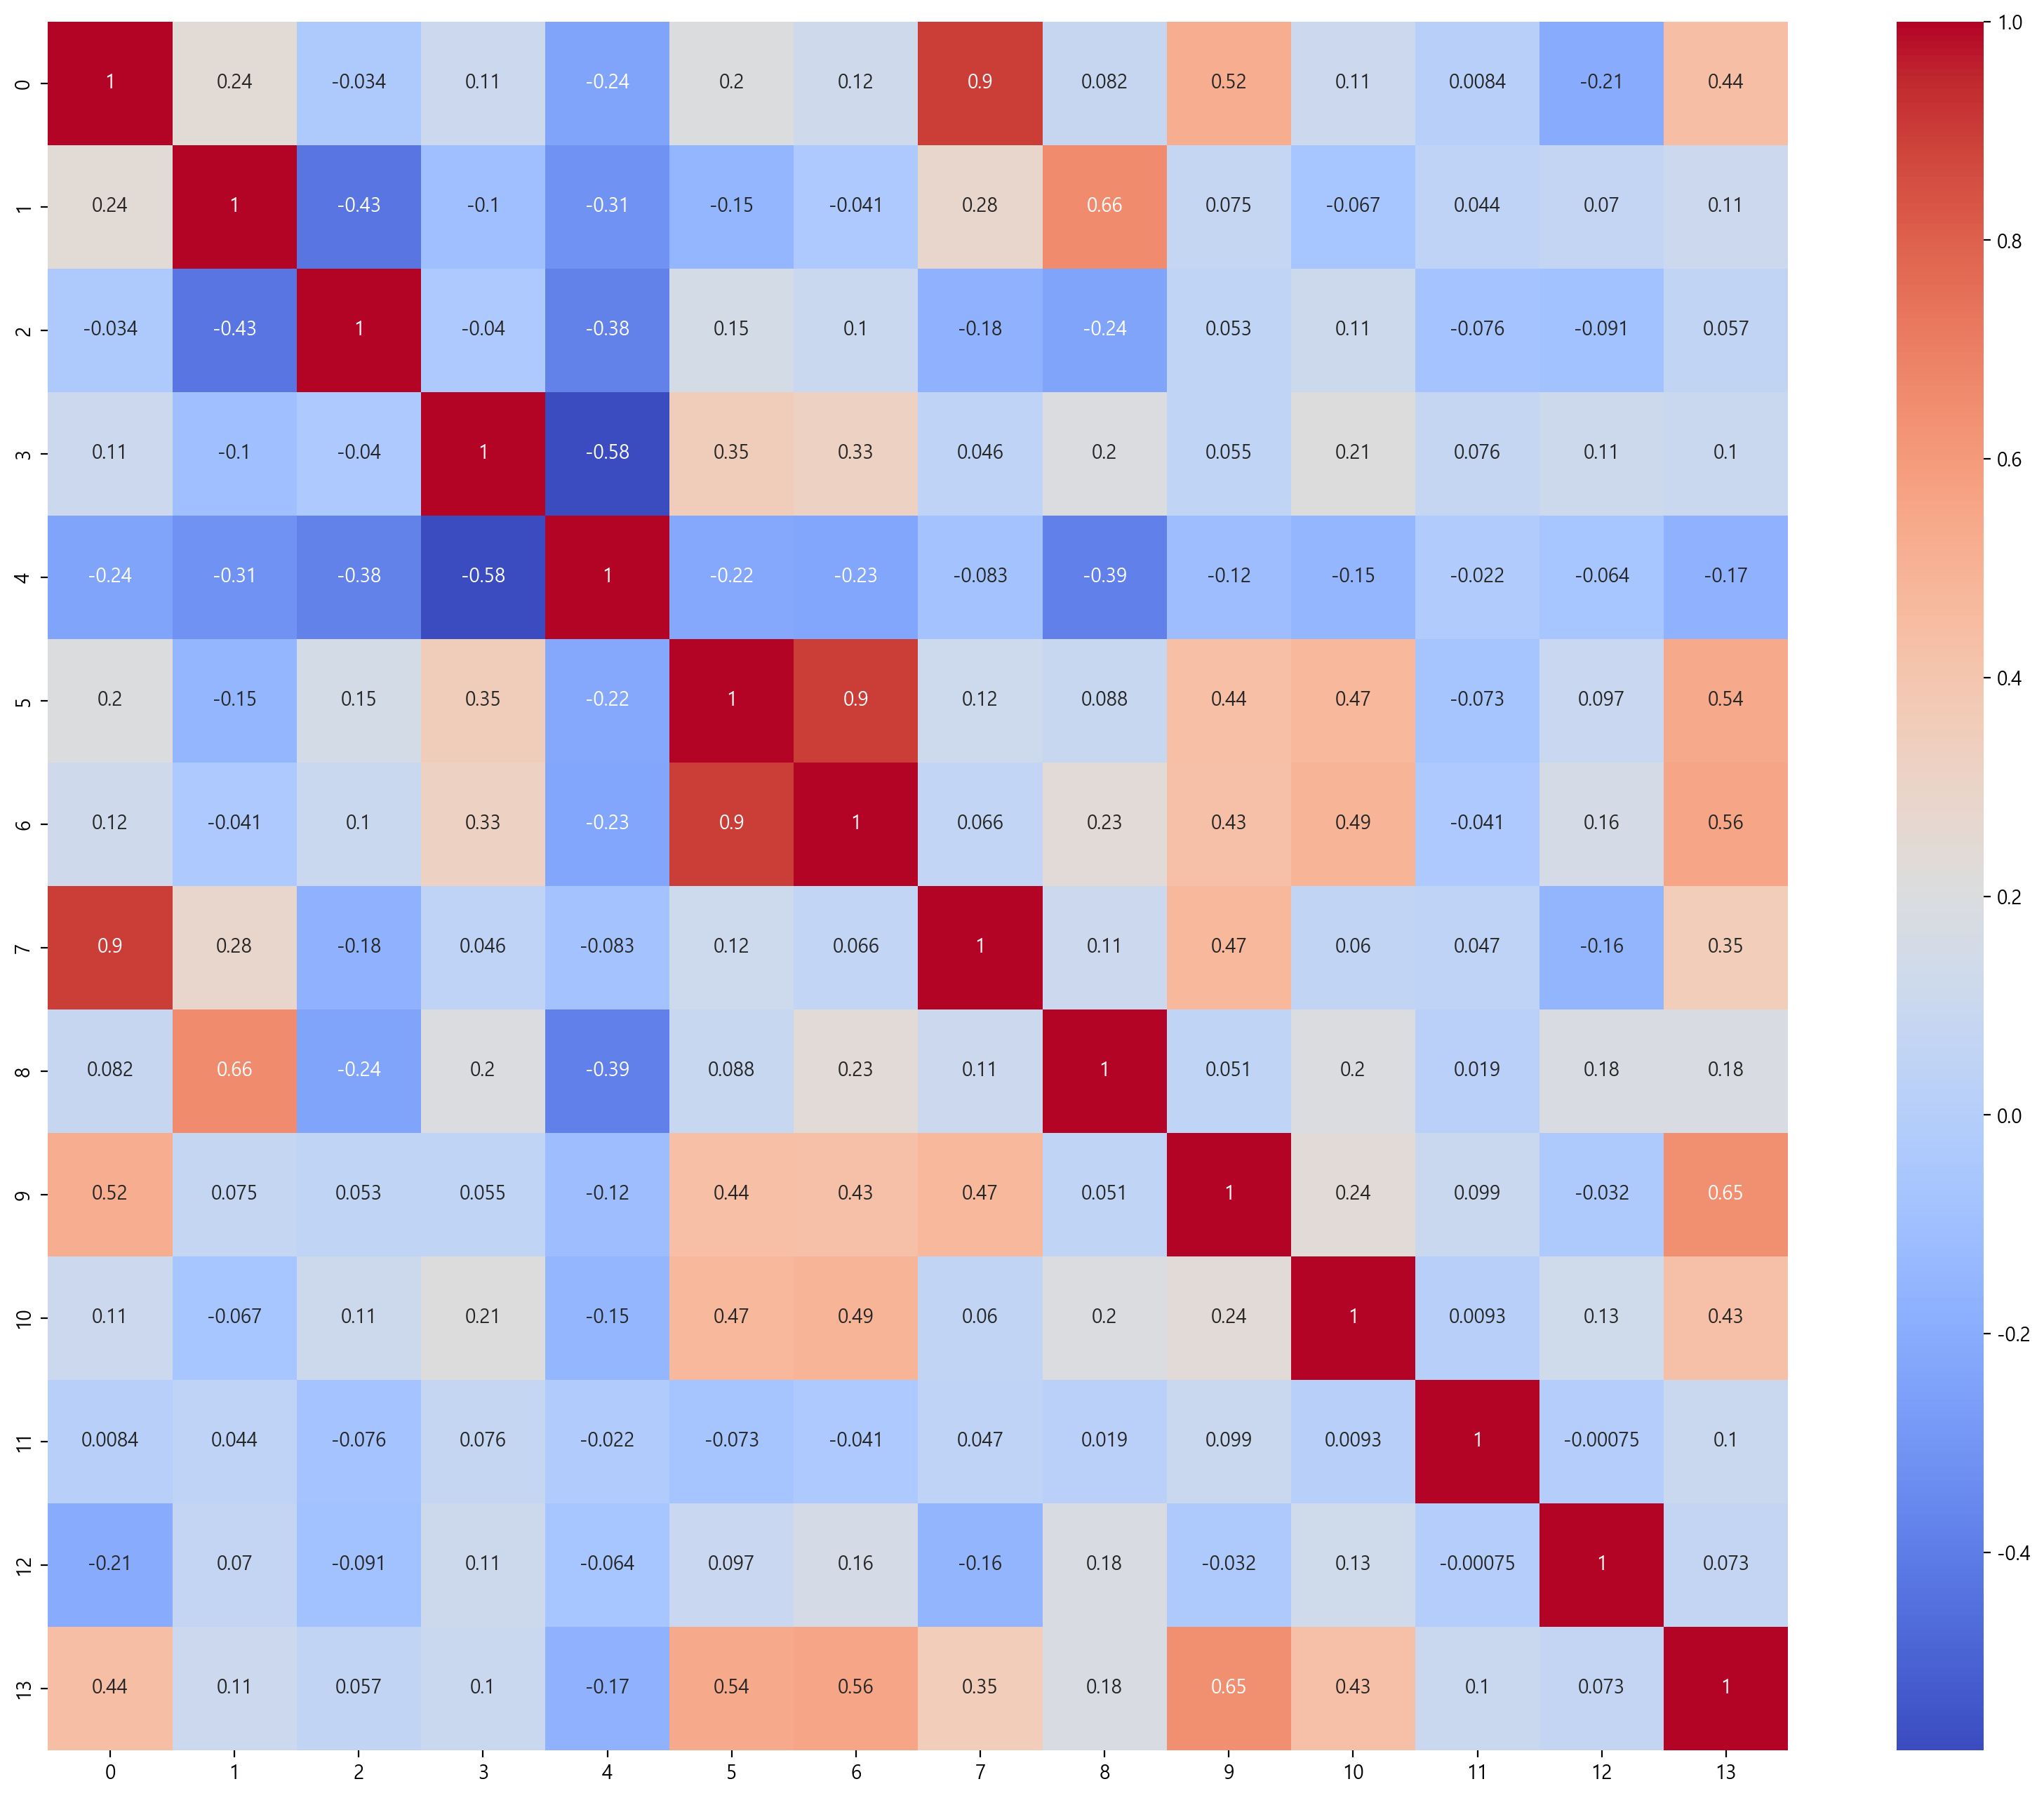

In [76]:
# 표준화 상관 관계 분석
X_std = StandardScaler().fit_transform(X)
correlation_matrix = np.corrcoef(X_std.T)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [77]:
# OLS 모델로 계수의 통계적 중요성 확인
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     62.94
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           8.66e-93
Time:                        16:52:56   Log-Likelihood:                -6650.3
No. Observations:                 425   AIC:                         1.333e+04
Df Residuals:                     410   BIC:                         1.339e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.418e+06   2.99e+06      1.476      0.1

In [97]:
#선형회귀모델 가정 확인하기
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
model_trained = model.fit()

c:\Users\hwnam\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


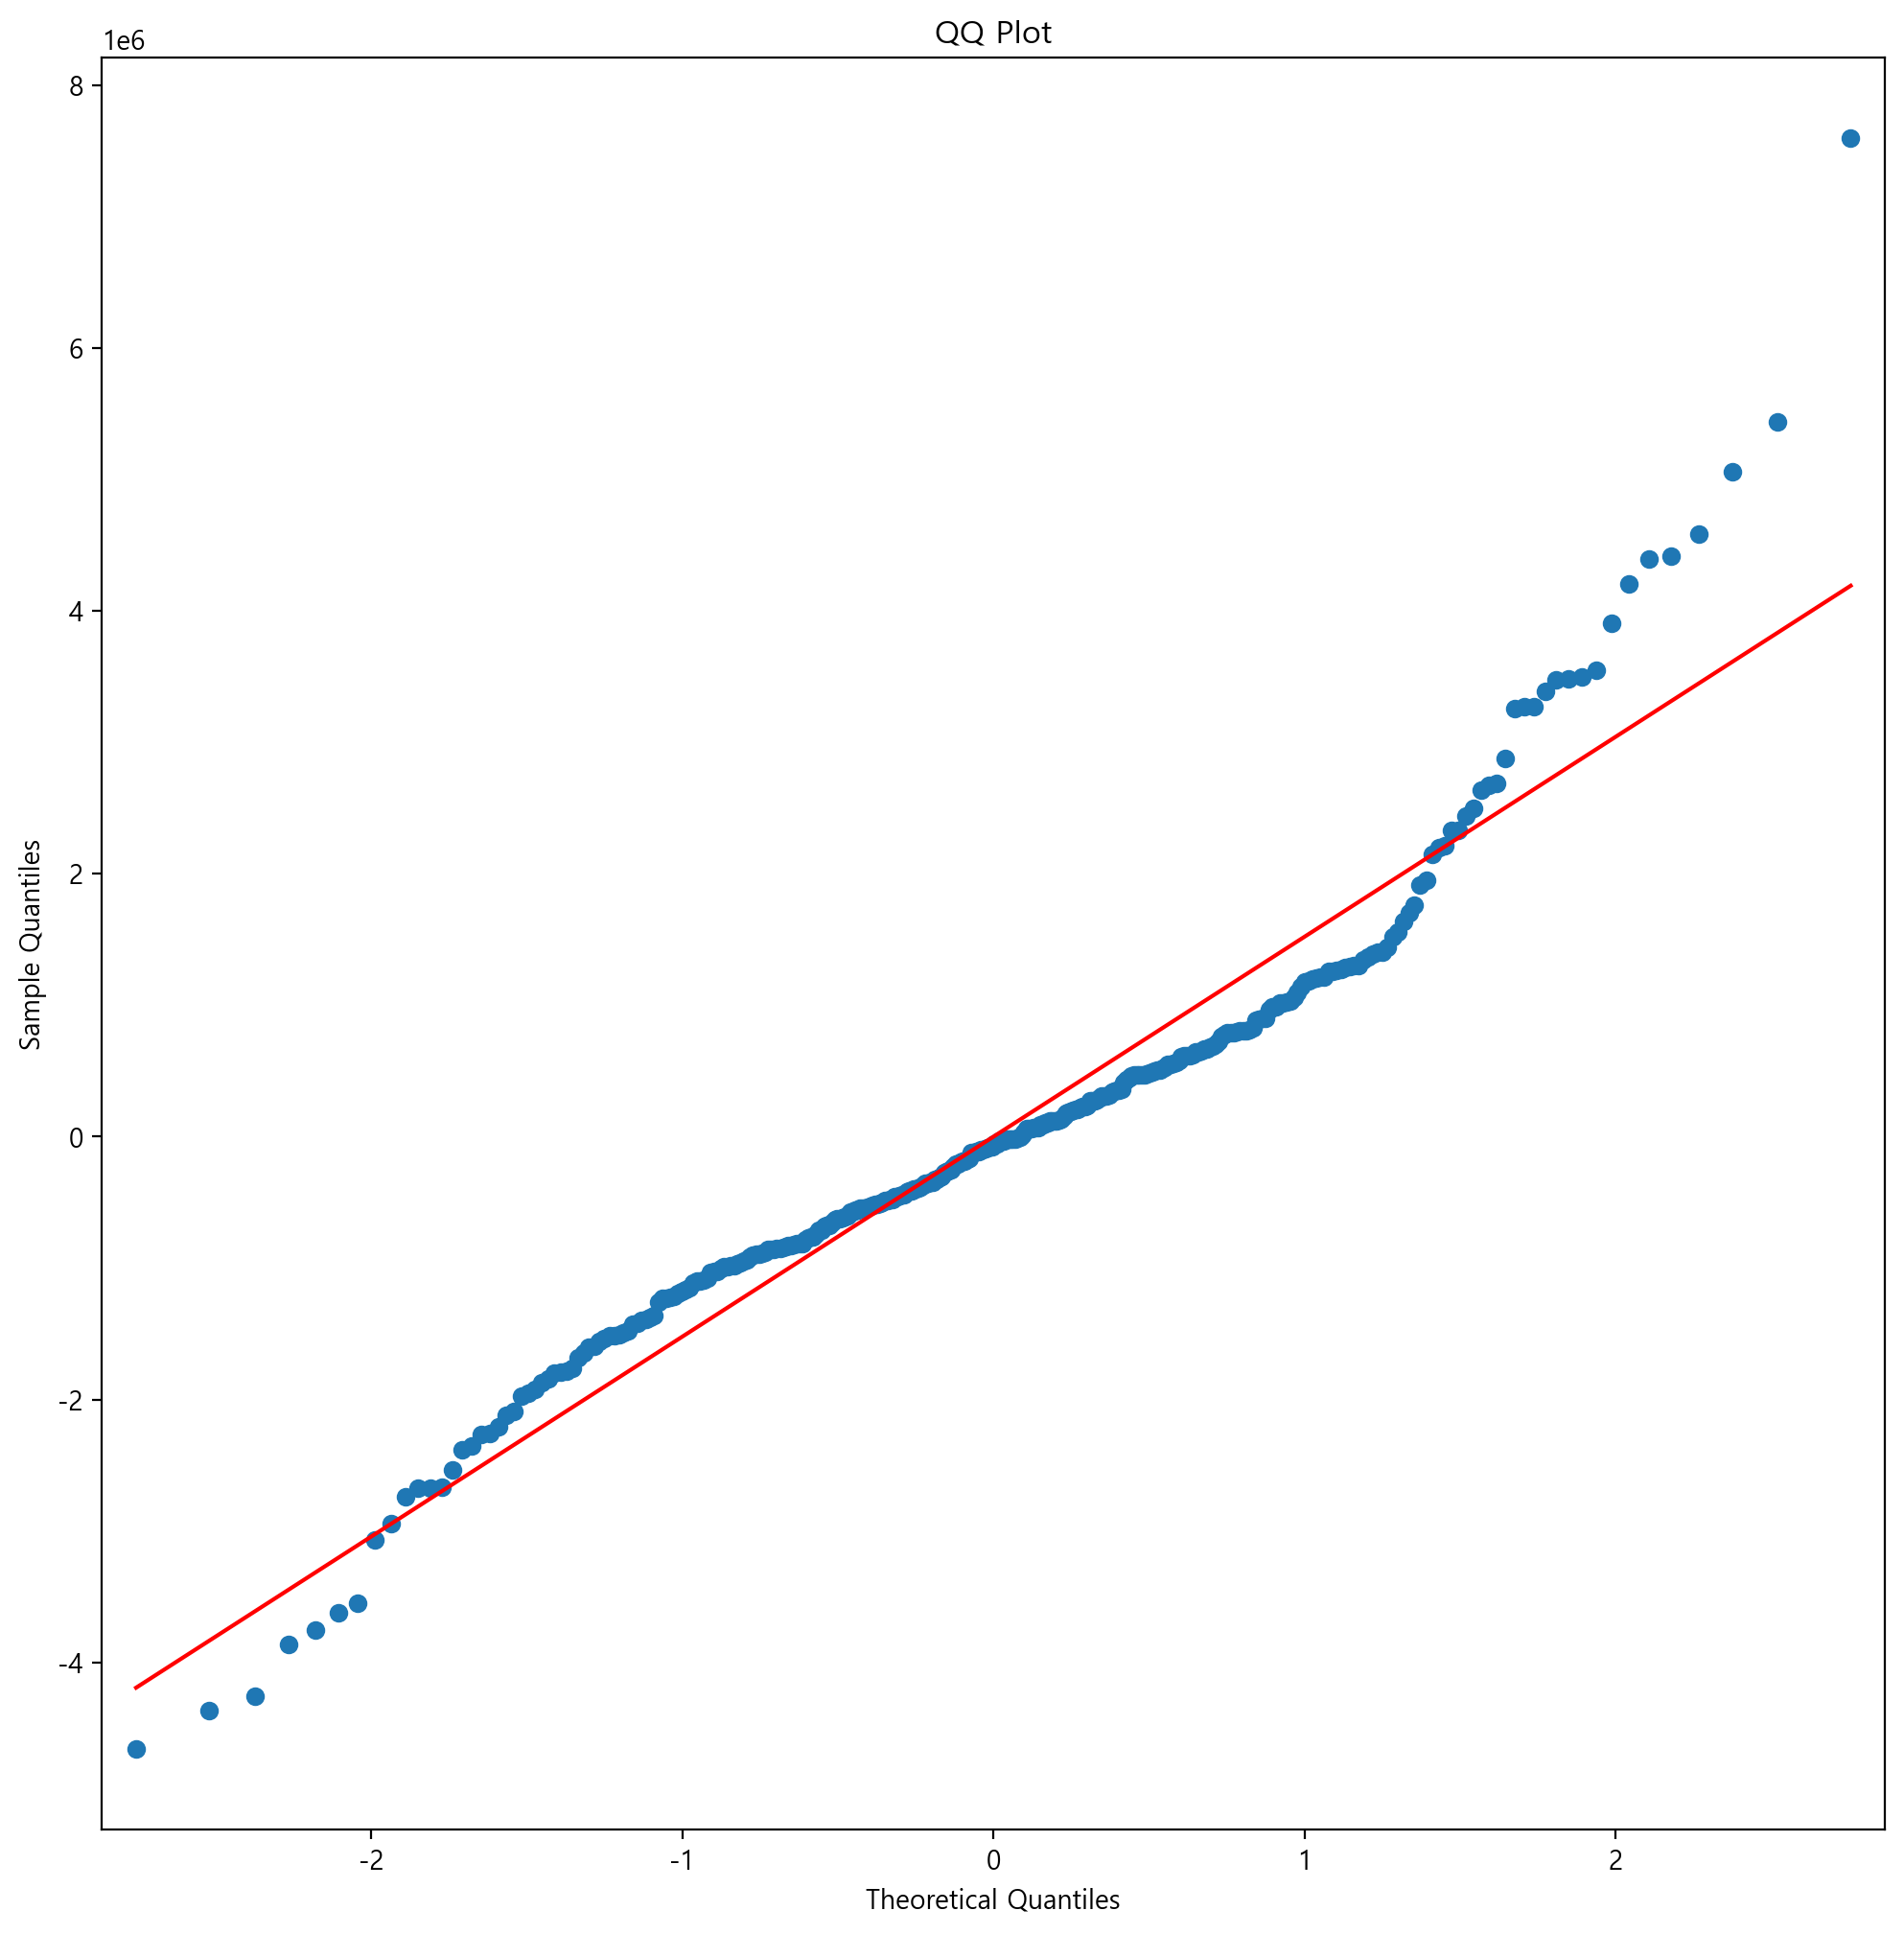

In [98]:
#확률오차의 정규성 확인
model_residuals = model_trained.resid  # 모델의 잔차 계산

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)  # 그래프를 그릴 도화지 생성
fig.set_figheight(12)  # 도화지의 세로 크기 설정
fig.set_figwidth(12)  # 도화지의 가로 크기 설정

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)  # 잔차의 QQ plot 그리기
ax.title.set_text('QQ Plot')  # 그래프 제목 설정

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'Residuals')]

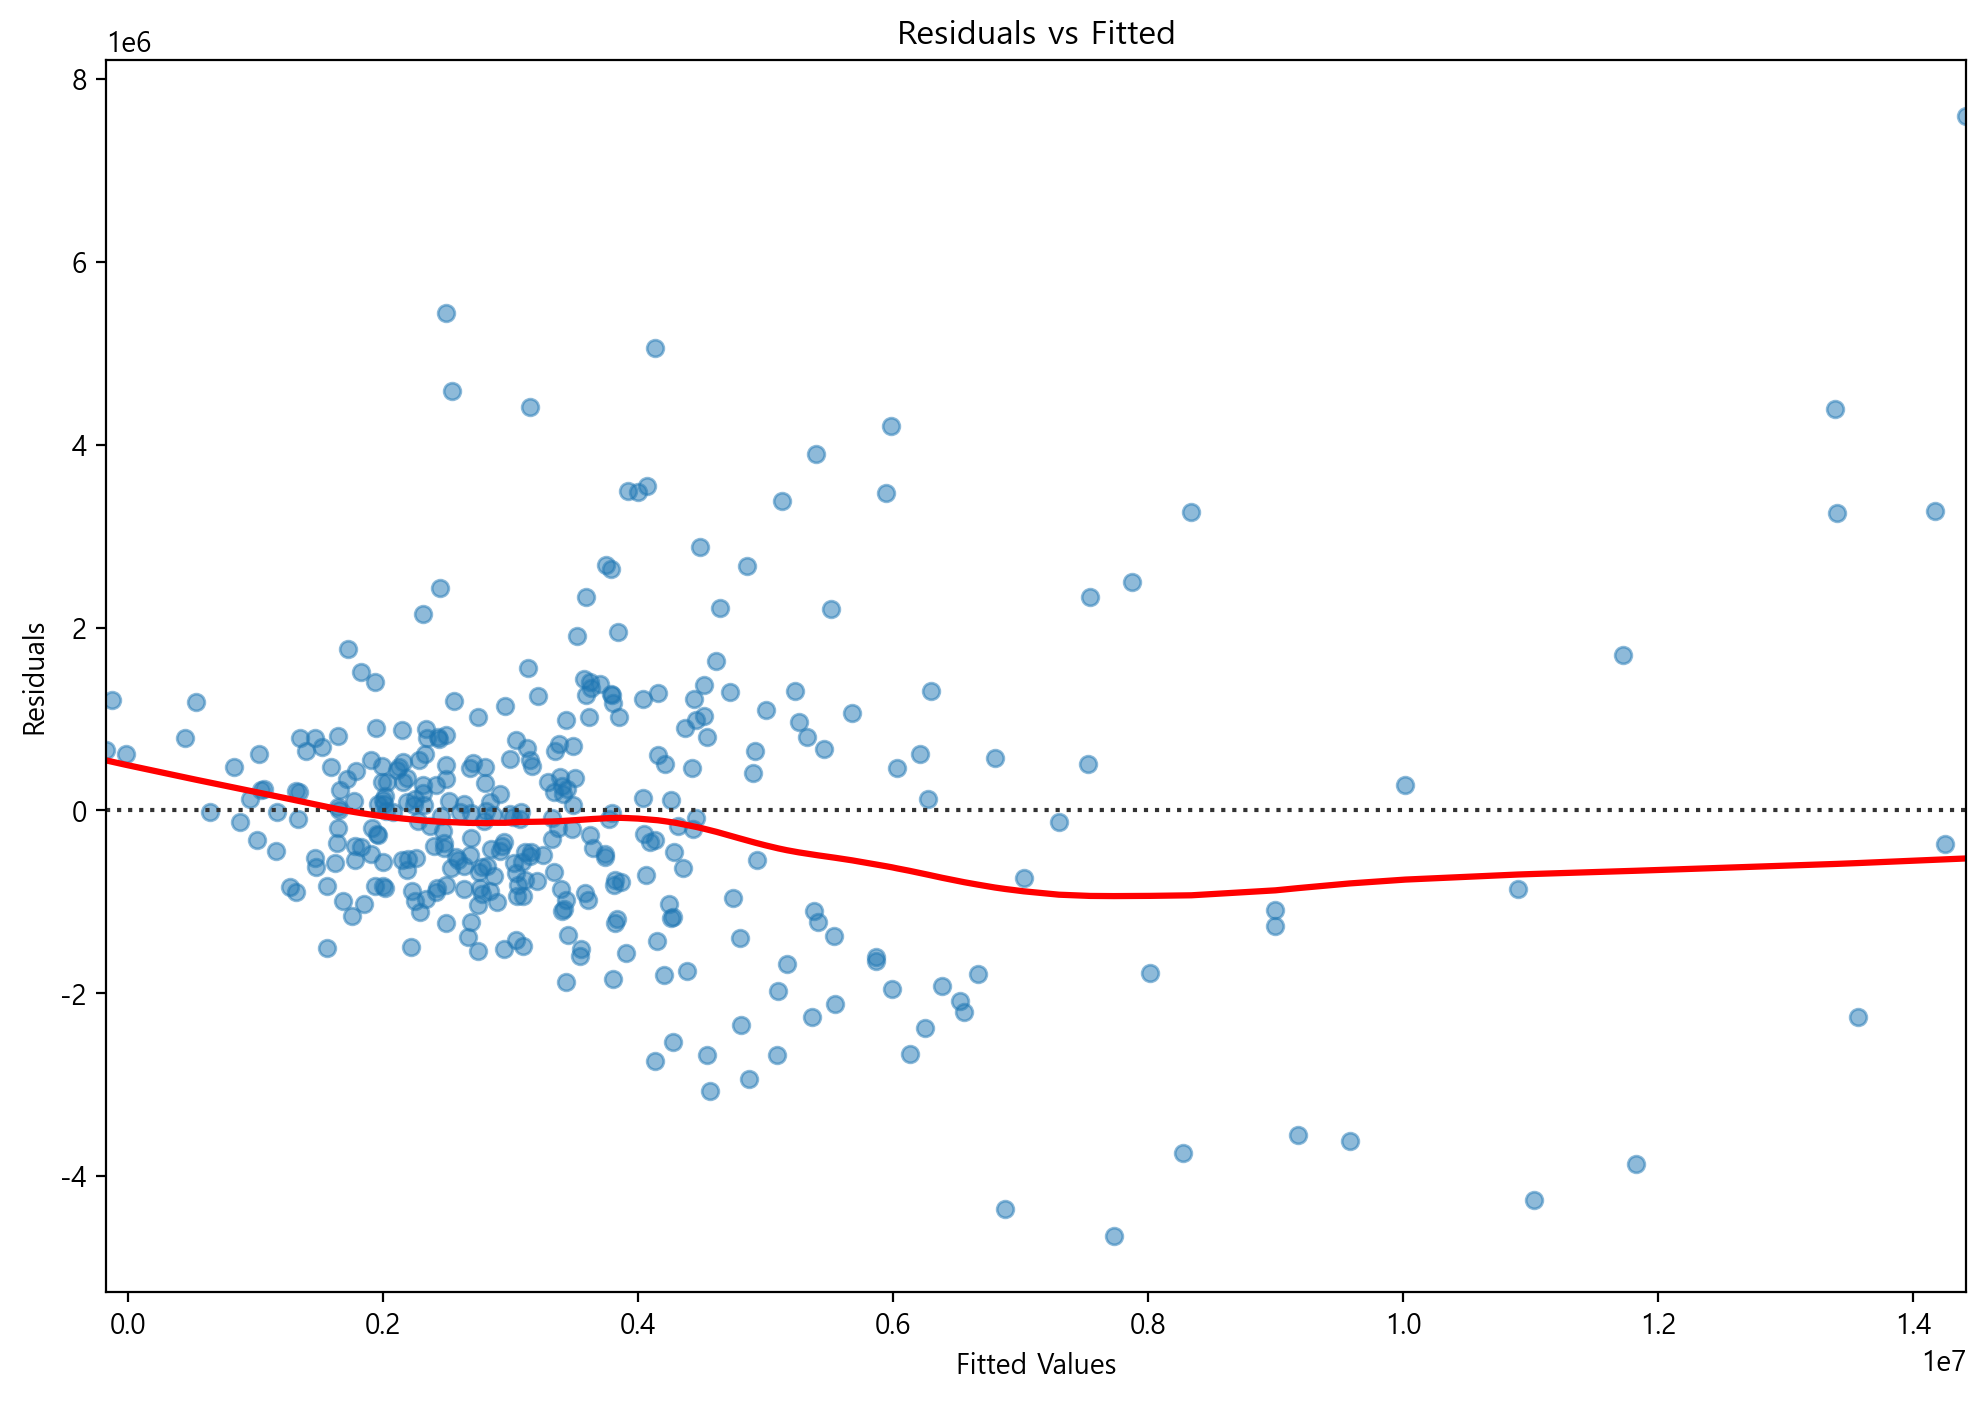

In [99]:
# 확률오차의 등분산성 확인
model_fitted_y = model_trained.fittedvalues  # 모델의 예측값 계산

fig, ax = plt.subplots(1, 1)  # 그래프를 그릴 도화지 생성
fig.set_figheight(8)  # 도화지의 세로 크기 설정
fig.set_figwidth(12)  # 도화지의 가로 크기 설정

sns.residplot(x = model_fitted_y, y = y_train, lowess=True, scatter_kws={'alpha' : 0.5}, line_kws={'color' : 'red'}, ax=ax)  # 잔차의 산점도 그리기
ax.title.set_text('Residuals vs Fitted')  # 그래프 제목 설정
ax.set(xlabel='Fitted Values', ylabel='Residuals')  # x축, y축 이름 설정

In [100]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     53.96
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           5.72e-76
Time:                        17:03:59   Log-Likelihood:                -5322.3
No. Observations:                 340   AIC:                         1.067e+04
Df Residuals:                     325   BIC:                         1.073e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.202e+06   3.41e+06      1.524      0.1

In [110]:
model = sm.OLS(y_train, X_train.drop(['집개수', '지하철역개수', '종사자수', 'age_10', '인구수', '노약자', '소득', '1인당자동차등록대수', 'age_3040'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  버스승차량   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.77e-83
Time:                        17:11:08   Log-Likelihood:                -5325.6
No. Observations:                 340   AIC:                         1.066e+04
Df Residuals:                     334   BIC:                         1.069e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.977e+05   5.31e+05      1.879      0.0